This dataset is designed to help researchers and data scientists predict crop yield based on key agricultural factors. It contains columns representing the amount of fertilizer used, temperature, and soil nutrients (nitrogen, phosphorus, and potassium), along with the corresponding crop yield. This dataset can be used for machine learning projects focusing on agricultural optimization, yield forecasting, and resource management. The data is structured and ready for analysis, making it ideal for training regression models or conducting exploratory data analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

In [68]:
data=pd.read_csv(r'Crop Yiled with Soil and Weather.csv')
data

,Fertilizer,temp,N,P,K,yeild
0,80.000000,28.000000,80.000000,24.000000,20.000000,12.000000
1,77.000000,27.000000,78.000000,23.000000,20.000000,12.000000
2,80.000000,26.000000,80.000000,24.000000,20.000000,12.000000
3,80.000000,28.000000,80.000000,24.000000,20.000000,12.000000
4,78.000000,27.000000,78.000000,23.000000,19.000000,12.000000
...,...,...,...,...,...,...
2591,78.942684,27.014634,76.838312,23.087606,20.044206,10.348503
2592,79.077362,27.153127,76.927657,23.068234,20.155436,10.528122
2593,78.986271,28.108948,77.164352,22.863654,20.989871,10.564205
2594,78.894767,28.141344,76.925149,23.071553,20.873662,10.442511


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fertilizer  2596 non-null   float64
 1   temp        2596 non-null   float64
 2   N           2596 non-null   float64
 3   P           2596 non-null   float64
 4   K           2596 non-null   float64
 5   yeild       2596 non-null   float64
dtypes: float64(6)
memory usage: 121.8 KB


In [5]:
data.describe()

,Fertilizer,temp,N,P,K,yeild
count,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000
mean,66.487433,33.848237,69.522900,20.708194,17.806268,8.533832
std,9.747669,5.371279,6.802806,1.973419,1.940037,1.938789
min,49.751436,23.771310,58.839466,17.723223,14.704883,5.150745
25%,59.865423,28.000000,64.834635,18.988224,15.975932,6.929404
50%,65.011969,36.965121,69.894076,20.889579,18.061975,8.501720
75%,76.943112,38.928914,76.845919,22.125618,19.133858,10.045179
max,80.223893,40.272480,80.218705,25.162178,22.064666,12.337651


In [7]:
data.isnull().sum()

Fertilizer    0
temp          0
N             0
P             0
K             0
yeild         0
dtype: int64

In [8]:
corr_data=data.corr()

Text(0.5, 1.0, 'Correlataion')

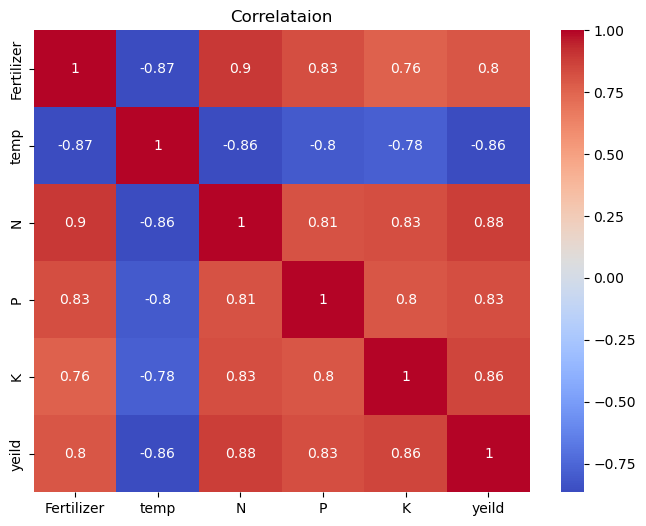

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_data,annot=True,cmap='coolwarm')
plt.title('Correlataion')

C:\Users\Master\AppData\Local\Temp\ipykernel_5572\3587523666.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


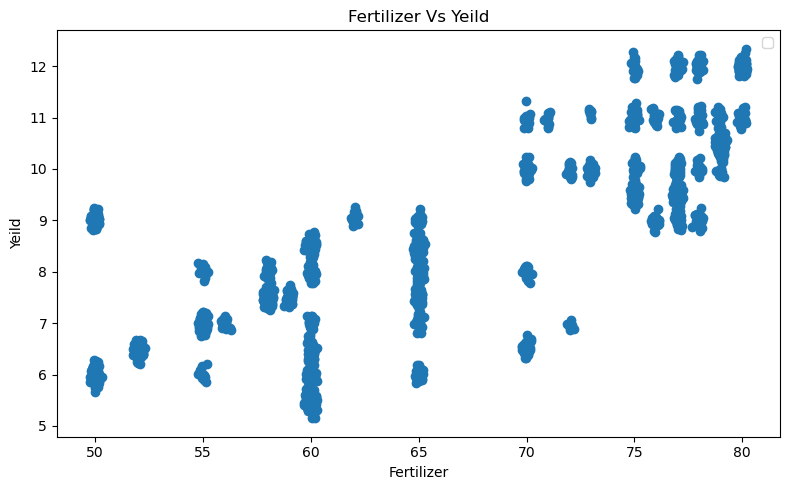

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(data['Fertilizer'],data['yeild'])
plt.title('Fertilizer Vs Yeild')
plt.xlabel('Fertilizer')
plt.ylabel('Yeild')
plt.tight_layout()
plt.legend()
plt.show()

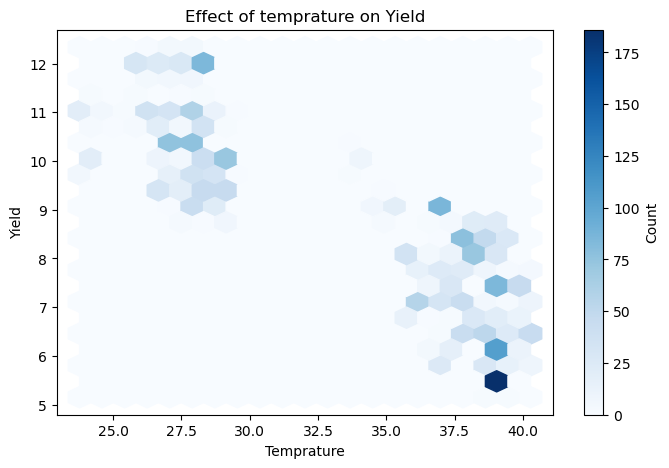

In [27]:
plt.figure(figsize=(8,5))
plt.hexbin(data['temp'],data['yeild'], gridsize=20, cmap='Blues')  # hexbin
plt.title('Effect of temprature on Yield')
plt.xlabel('Temprature')
plt.ylabel('Yield')
plt.colorbar(label='Count')  # shows density of points
plt.show()


C:\Users\Master\AppData\Local\Temp\ipykernel_5572\822442236.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


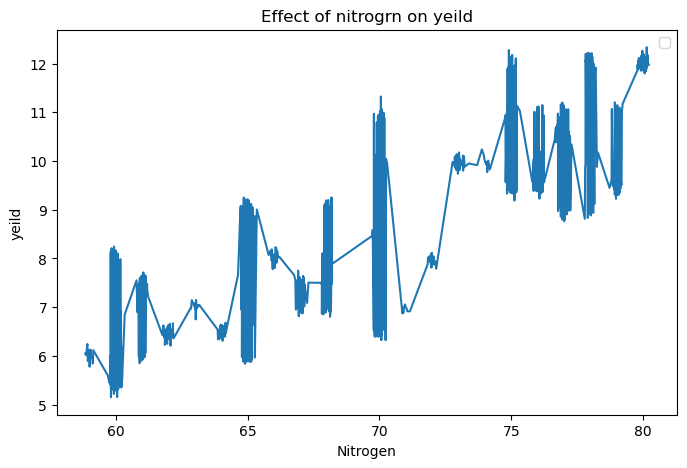

In [29]:
plt.figure(figsize=(8,5))
sns.lineplot(x=data['N'],y=data['yeild'])
plt.title('Effect of nitrogrn on yeild')
plt.xlabel('Nitrogen')
plt.ylabel('yeild')
plt.legend()
plt.show()

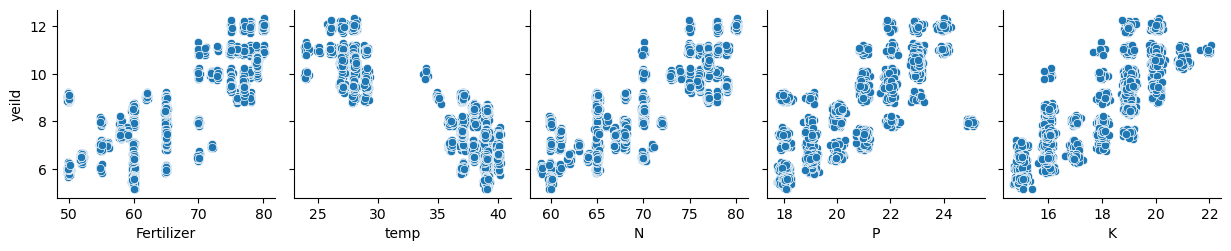

In [35]:
sns.pairplot(data, y_vars=['yeild'], x_vars=["Fertilizer","temp","N","P","K"])
plt.show()

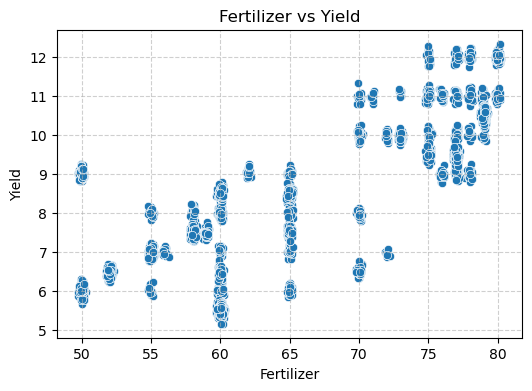

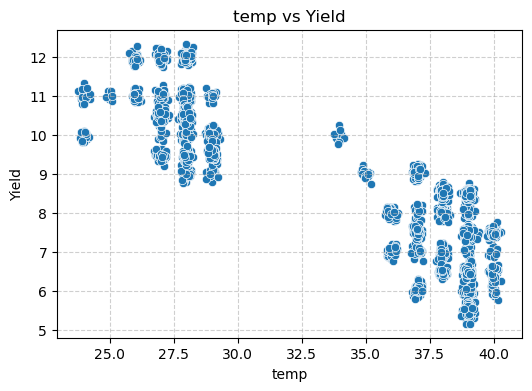

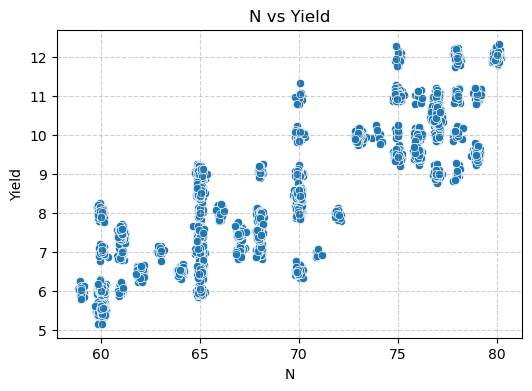

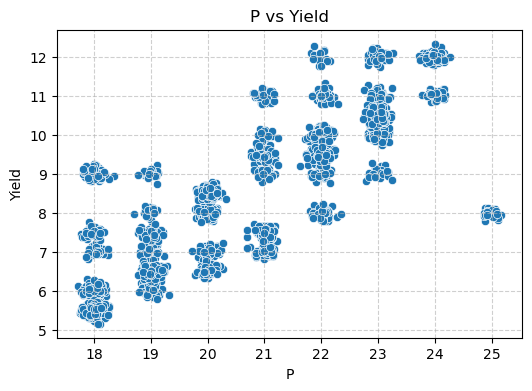

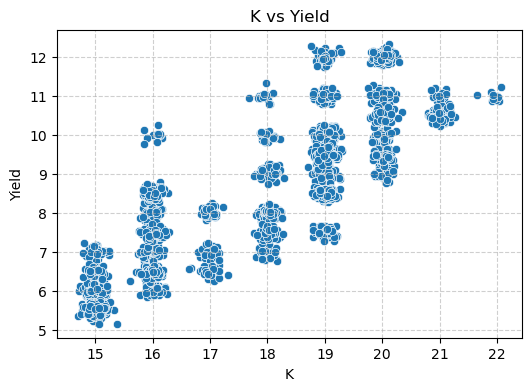

In [37]:
features = ["Fertilizer", "temp", "N", "P", "K"]

for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data[col], y=data['yeild'])
    plt.title(f"{col} vs Yield")
    plt.xlabel(col)
    plt.ylabel("Yield")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
Rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [43]:
X=data.drop('yeild',axis=1)
y=data['yeild']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [50]:
model=Rf.fit(X_train,y_train)

In [51]:
y_pred=model.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [61]:
print('mean squared error:',mean_squared_error(y_pred,y_test))
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('r2_score:',r2_score(y_pred,y_test))

mean squared error: 0.034707586525233175
mean absolute error: 0.122861517026612
r2_score: 0.9906248014348106


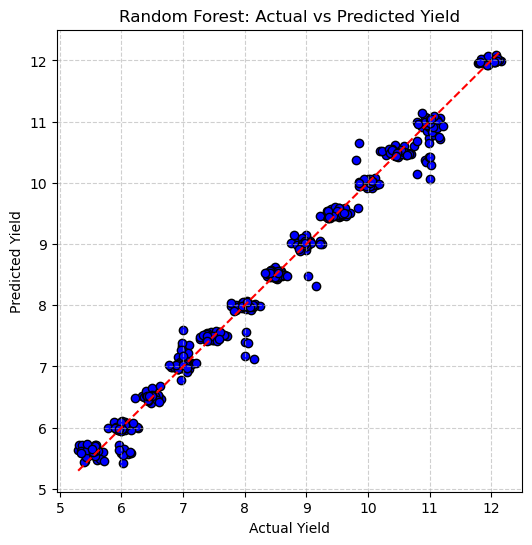

In [62]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Random Forest: Actual vs Predicted Yield")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


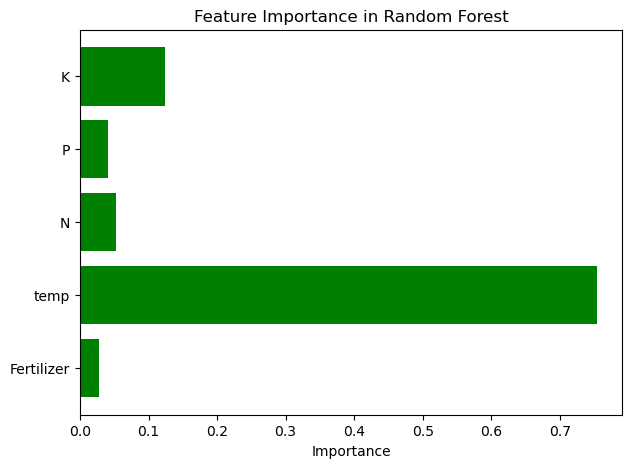

In [63]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(7,5))
plt.barh(features, importances, color="green")
plt.xlabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

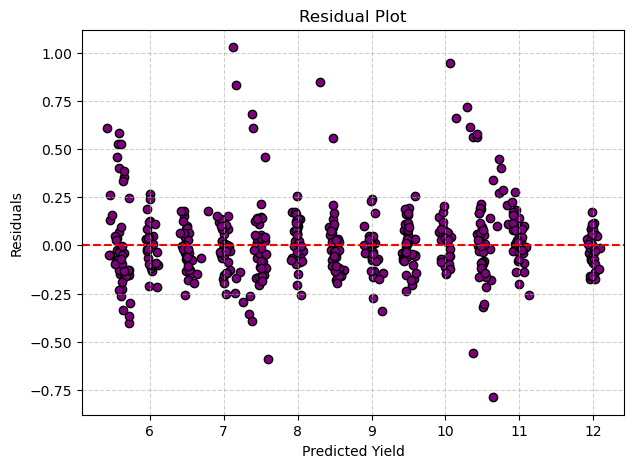

211     0.061092
2122   -0.006593
1739   -0.013624
2421   -0.318765
1670   -0.148608
          ...   
49     -0.121641
700    -0.046165
1113    0.098847
48      0.060327
845    -0.143933
Name: yeild, Length: 520, dtype: float64


In [65]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, color="purple", edgecolor="k")
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Yield")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
print(residuals)


In [70]:
# New data (Fertilizer, temp, N, P, K)
new_data = np.array([[79.050307, 26.980865, 77.124758, 23.050197, 19.960695]])


In [71]:
new_pred=model.predict(new_data)

c:\Users\Master\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [72]:
new_pred

array([10.50435725])